# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 5 + под вопросом задание 7: accuracy вышла другая. С заданием 7 будет 5,5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

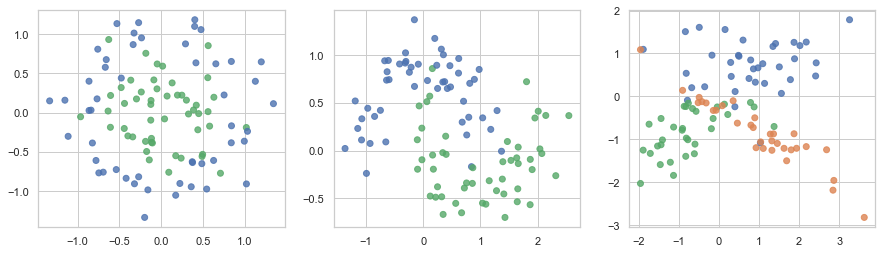

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, s =30, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

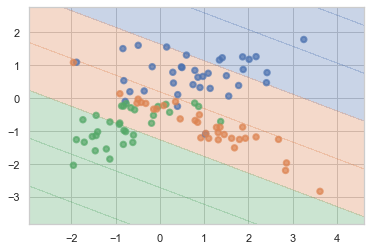

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset № 0  test accuracy score:  0.7666666666666667
Dataset № 0  train accuracy score:  1.0


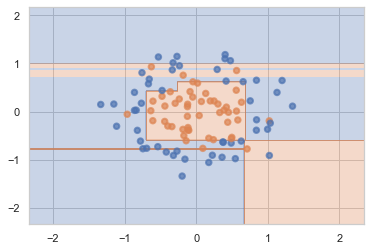

Dataset № 1  test accuracy score:  0.8666666666666667
Dataset № 1  train accuracy score:  1.0


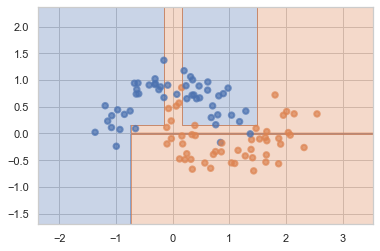

Dataset № 2  test accuracy score:  0.8
Dataset № 2  train accuracy score:  1.0


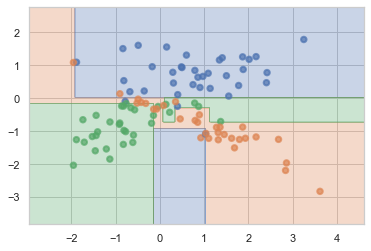

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

for i,_  in enumerate(datasets):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Dataset №', i, ' test accuracy score: ', score)
    y_pred = clf.predict(X_train)
    score = accuracy_score(y_train, y_pred)
    print('Dataset №', i, ' train accuracy score: ', score)
    plot_surface(clf, X, y)
    plt.show()

__Ответ:__ Судя по различным тонким линиям, заметным на всех трёх графиках -- достаточно сильно. Особенно сильно это проявляется на первом графике, чуть менее - на втором и третьем, хоть и там тоже это заметно. Но наиболее сильно это показывает accuracy на обучающей выборке -- они все показывают качество в 1, идеальное качество, но при этом оценка на тестовой выборке не такая оптимистичная, что однозначно говорит о переобучении.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

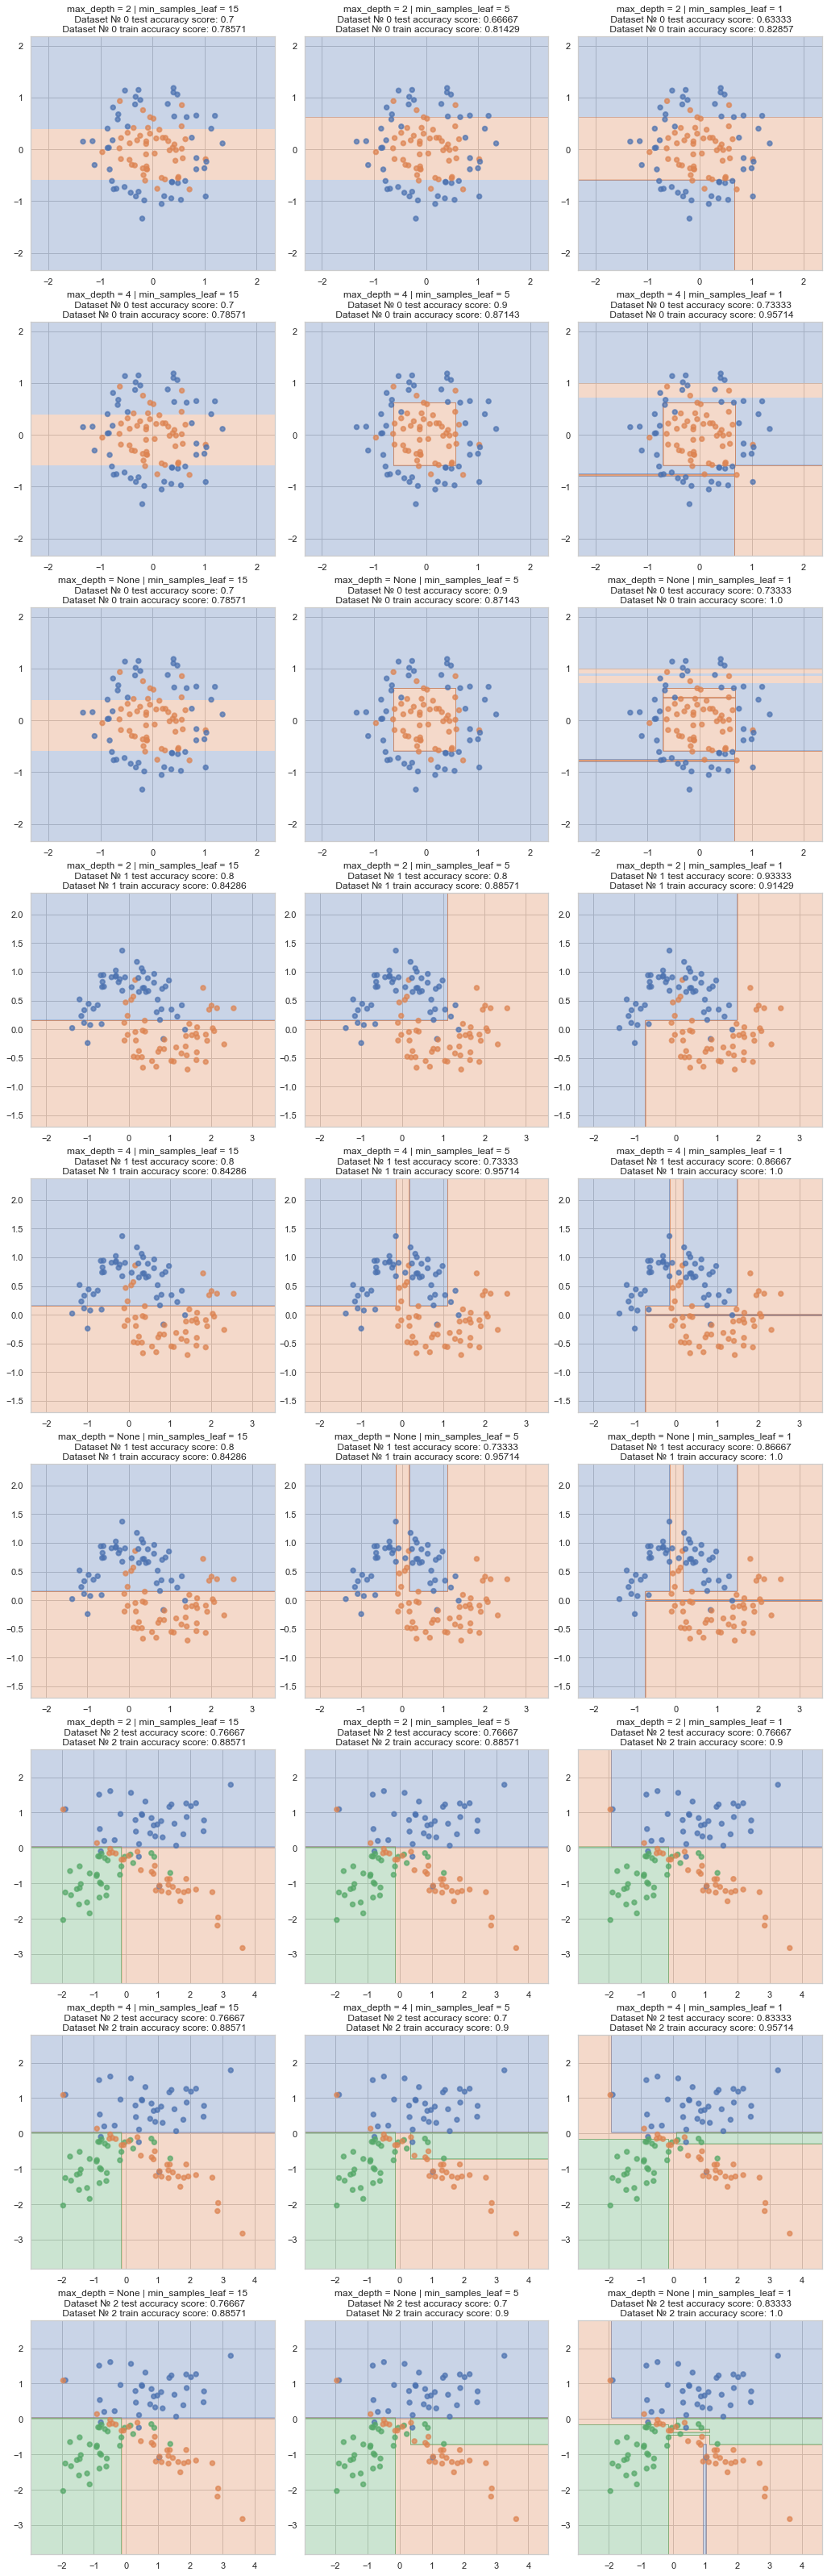

In [8]:
plt.figure(figsize=(15, 45))
for k,_  in enumerate(datasets):
    X, y = datasets[k]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    for i , max_depth in enumerate([2, 4, None]):
        for j , min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, random_state = 42).fit(X_train, y_train)            
            y_pred = clf.predict(X_test)
            test_score = accuracy_score(y_test, y_pred)
            y_pred = clf.predict(X_train)
            train_score = accuracy_score(y_train, y_pred)
            plt.subplot2grid((9, 3), ((i + k*3), j))
            plot_surface(clf, X, y)
            plt.title('max_depth = ' + str(max_depth) + ' | min_samples_leaf = ' + str(min_samples_leaf) +'\n Dataset № ' + str(k) + ' test accuracy score: ' + str(round(test_score,5)) + '\n Dataset № ' + str(k) + ' train accuracy score: ' + str(round(train_score,5)))

__Ответ:__ Судя по полученным графикам, чем меньше ограничений возлагается на глубину и количество листьев, тем более переобученная модель получается. В некоторых случаях доходит даже до "проседаний" accuracy на тестовой выборке: на некоторых графиках видно, как меняется в худшую сторону этот показатель, когда минимальное количество становится 5, чтобы потом вновь вырасти, когда минимум будет 15 (и при этом модель стабильно переобучивается, судя по accuracy на обучающей). Бывает и так, что показатель accuracy для тестовой выборки стабильно падает, пока этот же показатель растёт для обучающей (т.е. модель переобучается). Но что интересно, так это то, что глубина не оказывает особого эффекта на переобучение до тех пор, пока минимальное количество листьев остаётся оптимальной -- но когда минимум оказывается слишком мал, слабо ограниченная глубина сделает переобучение ещё сильнее. 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Примечание:__ Решение этого задания было найдено в открытом источнике по следующей ссылке: https://pastebin.com/aZbmEGbC. По ходу задания это решение было модифицировано.

__Ссылка на удачную посылку в контесте:__ https://contest.yandex.ru/contest/31332/run-report/59251735/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

151
0        0
1        1
2        1
3        2
4        2
      ... 
253    147
254    148
255    149
256    150
257    151
Name:  UNS, Length: 258, dtype: int64


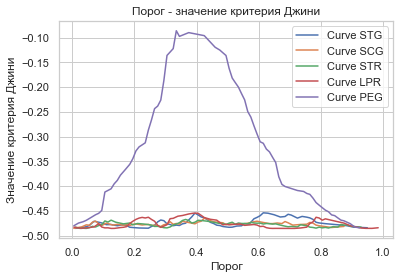

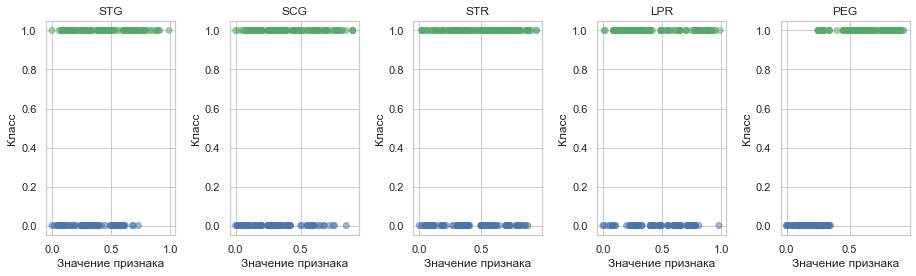

In [14]:
df = pd.read_csv(r"C:\Users\User\Documents\Machine Learning\HSE\5 hw\students.csv", sep=',')
X = df.drop(columns=[' UNS'])
y = df[' UNS']

print(np.sum(y))
print(np.cumsum(y))

from hw5code import find_best_split

plt.title("Порог - значение критерия Джини")
plt.xlabel('Порог')
plt.ylabel('Значение критерия Джини')
for i in range(5):
    thresholds, ginis, threshold_best, gini_best = find_best_split(X.iloc[:,i], y)
    plt.plot(thresholds, ginis, label = "Curve " +  df.columns[i])
    plt.legend()
plt.show()

plt.figure(figsize=(13, 4))

for i in range(5):    
    plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    plt.title(df.columns[i])
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    plt.scatter(X.iloc[:,i], y, c=y, cmap=cmap, alpha=.5)
    
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Судя по кривой значения Джини, следует производить деление выборки по признаку PEG, поскольку этот признак выгодно отличается от других -- он наиболее близко приближается к значению 0. Это также согласуется и с визуальной оценкой scatter-графика этого признака -- на нём видно, что значение по этому признаку практически однозначно делится на тот или иной класс. Скорее всего, график кривой Джини для "хороших" признаков будет приближен к нормальному виду, в то время как для тех, по которым деление невозможно, график практически не будет как-либо "расти вверх", а будет находиться примерно на одном уровне.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».
 
__Примечание:__ Решение этого задания было найдено в открытом источнике по следующей ссылке: https://pastebin.com/aZbmEGbC.

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [10]:
from sklearn import preprocessing
from hw5code import DecisionTree
mushrooms_df = pd.read_csv(r"C:\Users\User\Documents\Machine Learning\HSE\5 hw\agaricus-lepiota.data", header=None)

le = preprocessing.LabelEncoder()
mushrooms_df.apply(le.fit_transform)

X = mushrooms_df.drop(columns=0).to_numpy()
y = mushrooms_df[0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

cat_arr = []
for i in range(22):
    cat_arr.append("categorical")

dt = DecisionTree(cat_arr)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5132939438700148


__Важное примечание!__

При выполнении заданий 3 и 6 (хоть тут и неудачно) было использовано решение, найденное в открытом источнике по следующей ссылке: https://pastebin.com/aZbmEGbC. Оно было в дальнейшем модифицировано для того, чтобы наиболее полно ответить условиям задачи.